In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
pd.set_option('display.max_rows', None, 'display.max_columns', None)

In [3]:
# add the column labels
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'Label'
,'level'])

In [18]:
df = pd.read_csv('/home/mintssj/Downloads/kddcup.data',header=None,names=columns)

Drop 'level' column

In [19]:
df.drop('level',axis=1,inplace=True)

In [8]:
df.value_counts('Label')

Label
smurf.              2807886
neptune.            1072017
normal.              972781
satan.                15892
ipsweep.              12481
portsweep.            10413
nmap.                  2316
back.                  2203
warezclient.           1020
teardrop.               979
pod.                    264
guess_passwd.            53
buffer_overflow.         30
land.                    21
warezmaster.             20
imap.                    12
rootkit.                 10
loadmodule.               9
ftp_write.                8
multihop.                 7
phf.                      4
perl.                     3
spy.                      2
Name: count, dtype: int64

In [9]:
df.isna().sum().sum()

0

# Preprocessing

In [10]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4898431.0,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06,4.898431e+06
mean,4.834243e+01,1.834621e+03,1.093623e+03,5.716116e-06,6.487792e-04,7.961733e-06,1.243766e-02,3.205108e-05,1.435290e-01,8.088304e-03,6.818510e-05,3.674646e-05,1.293496e-02,1.188748e-03,7.430951e-05,1.021143e-03,0.0,4.082940e-07,8.351654e-04,3.349734e+02,2.952671e+02,1.779703e-01,1.780370e-01,5.766509e-02,5.773010e-02,7.898842e-01,2.117961e-02,2.826080e-02,2.329811e+02,1.892142e+02,7.537132e-01,3.071111e-02,6.050520e-01,6.464107e-03,1.780911e-01,1.778859e-01,5.792780e-02,5.765941e-02
std,7.233298e+02,9.414311e+05,6.450123e+05,2.390833e-03,4.285434e-02,7.215084e-03,4.689782e-01,7.299408e-03,3.506116e-01,3.856481e+00,8.257146e-03,8.082432e-03,3.938075e+00,1.241857e-01,8.737590e-03,3.551048e-02,0.0,6.389788e-04,2.888716e-02,2.119908e+02,2.459927e+02,3.818756e-01,3.822541e-01,2.322529e-01,2.326604e-01,3.892958e-01,8.271458e-02,1.405596e-01,6.402094e+01,1.059128e+02,4.111860e-01,1.085432e-01,4.809877e-01,4.125978e-02,3.818382e-01,3.821774e-01,2.309428e-01,2.309777e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,4.500000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,1.210000e+02,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.550000e+02,4.900000e+01,4.100000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,5.200000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,5.100000e+02,5.100000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.550000e+02,2.550000e+02,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,1.032000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,5.110000e+02,5.110000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.550000e+02,2.550000e+02,1.000000e+00,4.000000e-02,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.

Drop column 'num_outbound_cmds' for being null

In [20]:
df.drop('num_outbound_cmds',axis=1,inplace=True)

## 1. Outlier Filtering

In [161]:
from scipy import stats


# Define wich columns will be filtered based on conditions:

columns_to_filter = []
for col in df.columns:
    if df[col].dtype != 'object':
        if df[col].nunique() > 100:
            if df[col].max() > 10 * df[col].mean(axis=0,numeric_only=True):
                columns_to_filter += [col]


# Define a function to filter outliers using Z-score
def filter_outliers_zscore(data, threshold):
    z_scores = np.abs(stats.zscore(data))
    outlier_mask = (z_scores > threshold).any(axis=1)
    return data[~outlier_mask], data[outlier_mask]

# Define a threshold value
threshold = 7

filtered_cols = []
removed_outliers = []
for col in columns_to_filter:    
    filtered_col, outliers = filter_outliers_zscore(df[[col]], threshold)
    
    filtered_cols.append(filtered_col)
    removed_outliers.append(outliers)

# Combine the filtered columns back into a dataframe
df_filtered = pd.concat(filtered_cols, axis=1)

# Combine the removed outliers back into a dataframe
df_outliers = pd.concat(removed_outliers, axis=1)

# Dataframe filtering comparison

print(f'Shape: {df.shape}')

# Print the number of outliers removed for each column

print('Outlier removal summary:')
n_outliers = df_outliers.shape[0]
print(f'{n_outliers} outliers rows to be removed')

# Print the original dataframe and the filtered dataframe side by side
print('\nOriginal dataframe:')
display(df.head())

# Assign filtered dataframe columns to original one
columns = columns_to_filter
df.loc[:,columns] = df_filtered.loc[:,columns]


print('\nFiltered dataframe:')
display(df.head())

# Print the removed outliers dataframe
print('\nRemoved outliers:')
display(df_outliers.head())

# Count how many rows of each attack were removed from original dataframe
values_orig = df.loc[df.index.isin(df_outliers.index), 'Label']
print(f'\n{values_orig.value_counts()}')

Shape: (125973, 41)
Outlier removal summary:
650 outliers rows to be removed

Original dataframe:


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal



Filtered dataframe:


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Label
0,0.0,tcp,ftp_data,SF,491.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0.0,udp,other,SF,146.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0.0,tcp,private,S0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0.0,tcp,http,SF,232.0,8153.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0.0,tcp,http,SF,199.0,420.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal



Removed outliers:


,duration,src_bytes,dst_bytes,srv_count,dst_host_diff_srv_rate
115,25950.0,NaN,NaN,NaN,NaN
289,36613.0,NaN,NaN,NaN,NaN
396,31401.0,NaN,NaN,NaN,NaN
591,41285.0,NaN,NaN,NaN,NaN
785,21263.0,NaN,NaN,NaN,NaN



Label
portsweep    604
normal        46
Name: count, dtype: int64


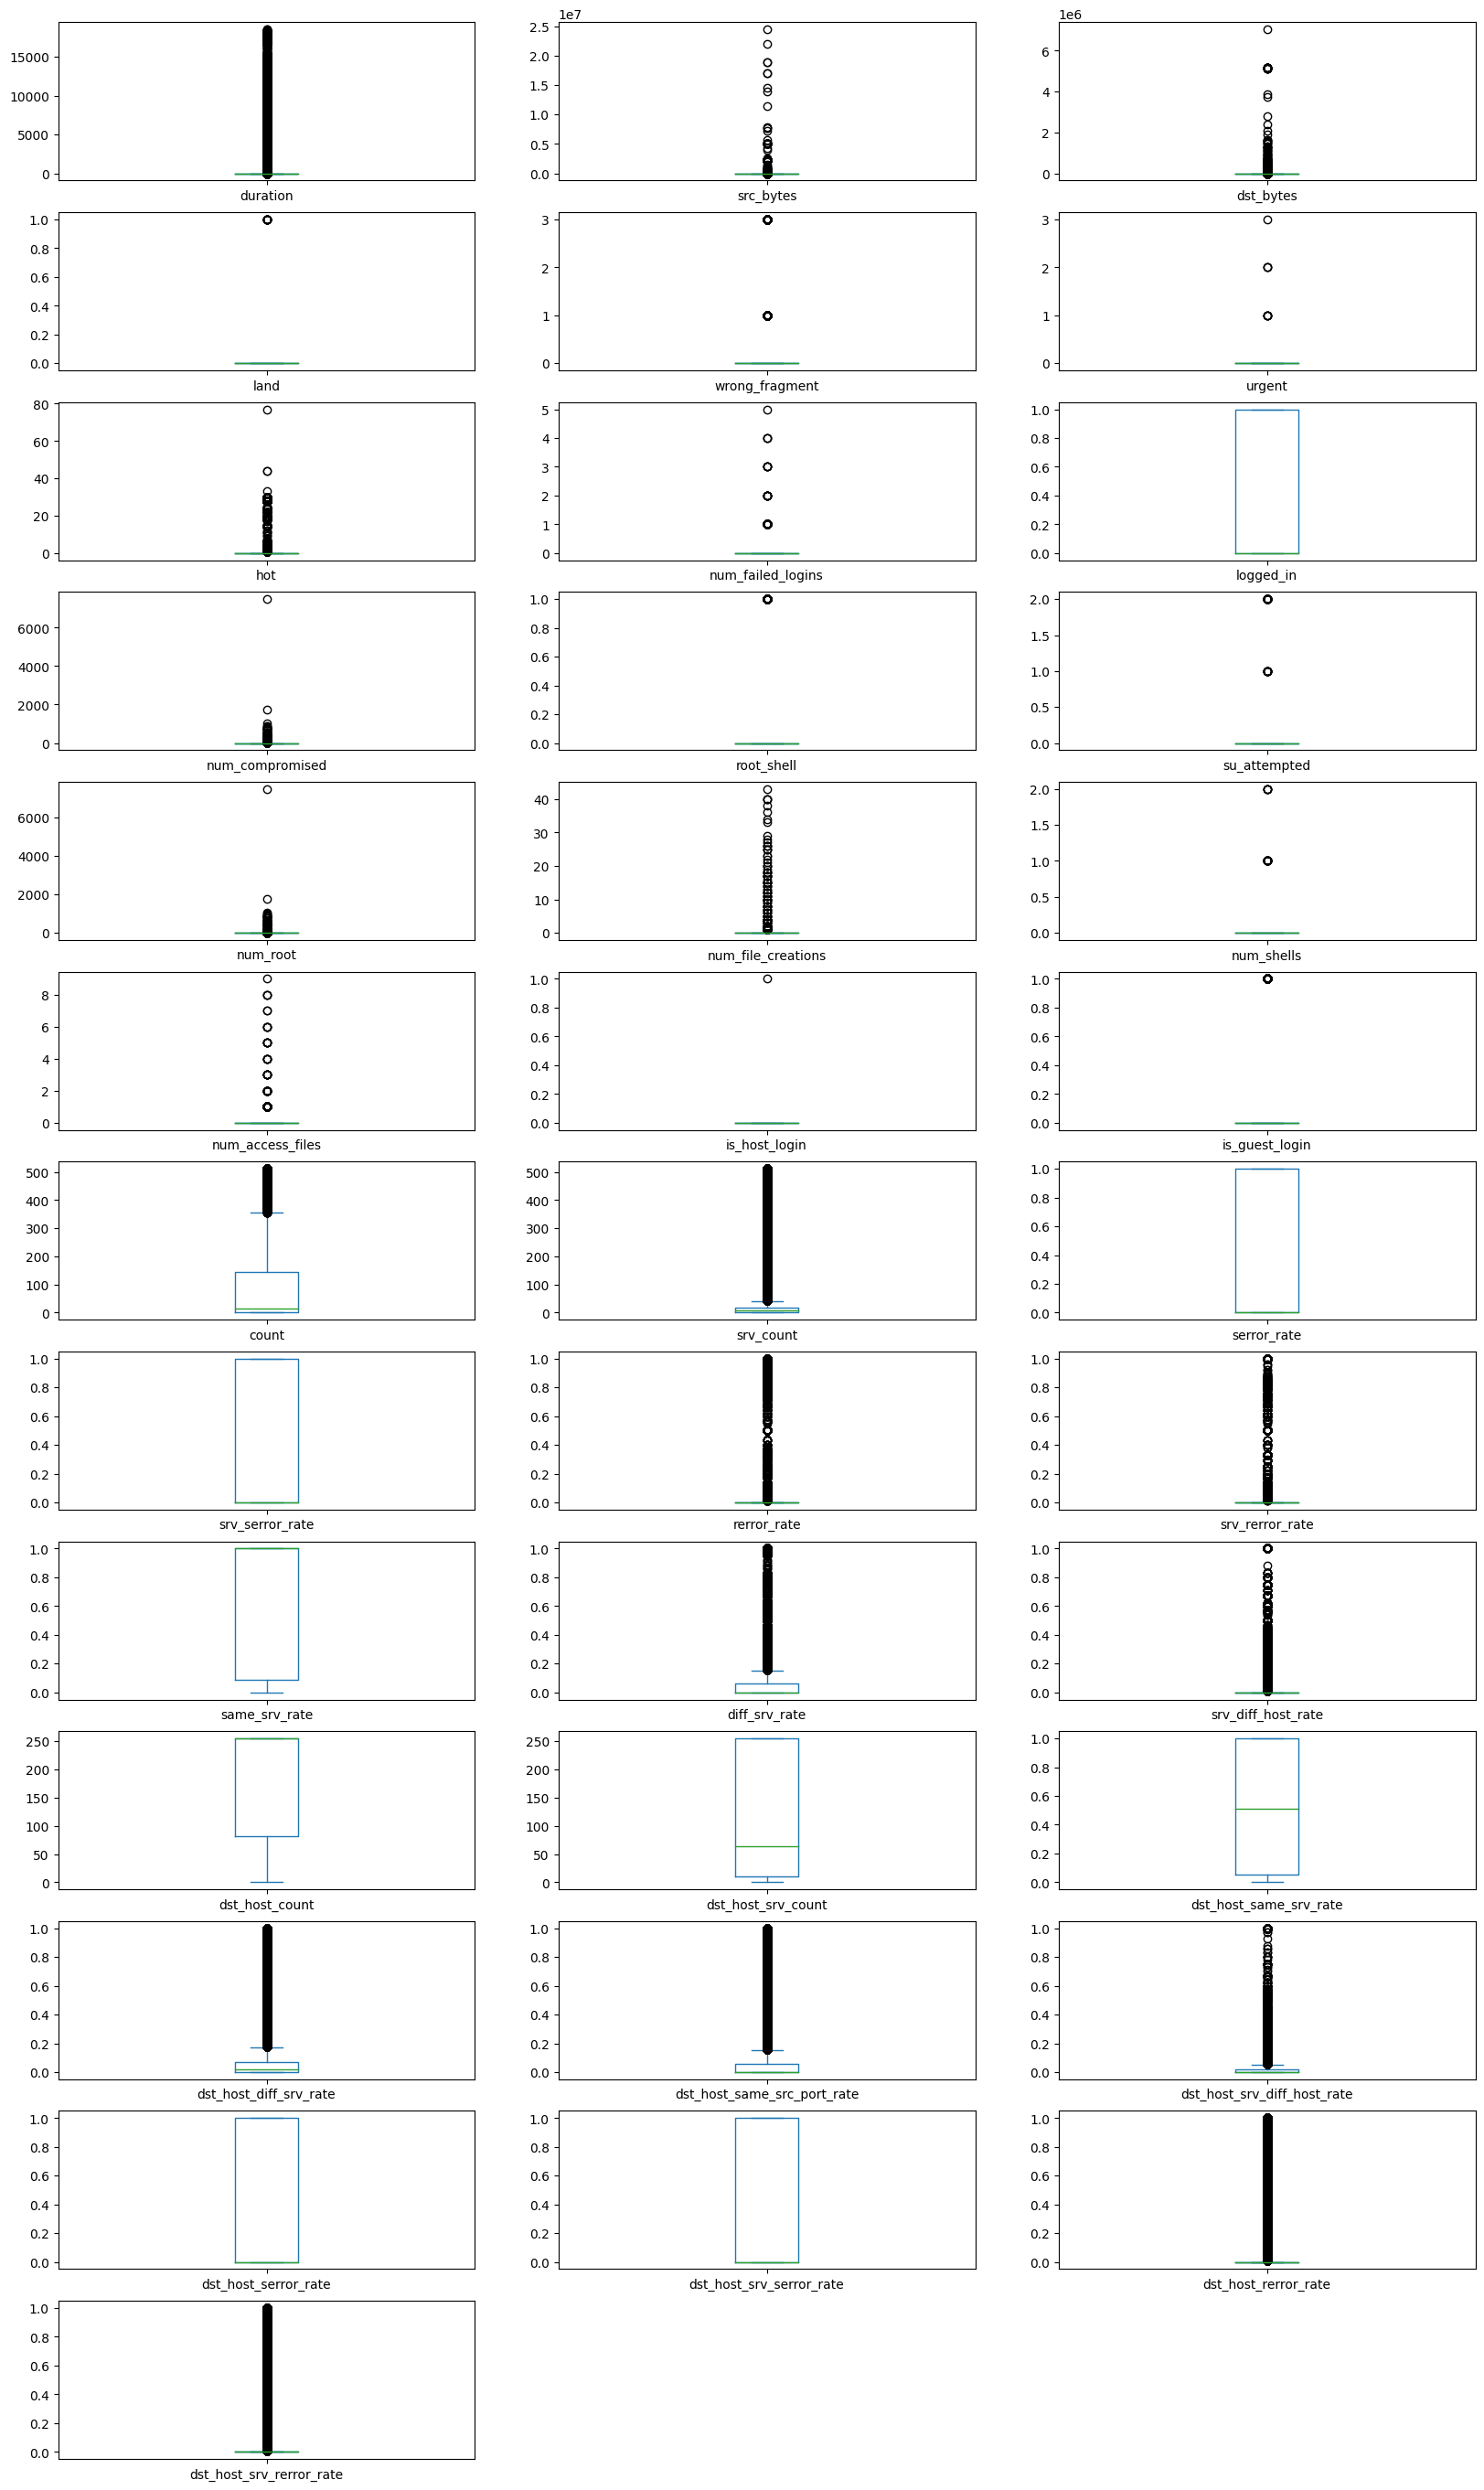

In [162]:

df.plot(kind='box',subplots=True,layout=(15,3),figsize=(20,40))
plt.show()

In [163]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125326.000000,1.259660e+05,1.259700e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,121.610217,9.440513e+03,3.025441e+03,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,0.001342,0.001103,0.302192,0.012669,0.000413,0.004096,0.000008,0.009423,84.107555,27.737888,0.284485,0.282485,0.119958,0.121183,0.660928,0.063053,0.097322,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,1095.885265,2.162225e+05,7.399948e+04,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,0.036603,0.045154,24.399618,0.483935,0.022181,0.099370,0.002817,0.096612,114.508607,72.635840,0.446456,0.447022,0.320436,0.323647,0.439623,0.180314,0.259830,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,143.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,18501.000000,2.441878e+07,7.028652e+06,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,1.000000,2.000000,7468.000000,43.000000,2.000000,9.000000,1.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 41 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125326 non-null  float64
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125966 non-null  float64
 5   dst_bytes                    125970 non-null  float64
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

Count how many NaN values there are overall in the dataset (All added in the remove outlier step):

In [12]:
df.isna().sum().sum()

0

Count how many rows have at leat one NaN value:

In [13]:
na_row_count = (df.isnull().sum(axis=1) > 0).sum()
print(na_row_count)

0


In [167]:
df = df.dropna()

## 2. Normalization

In [168]:
from sklearn.preprocessing import MinMaxScaler
columns = [col for col in df.columns if col not in ['protocol_type','service','flag','Label']]
min_max_scaler = MinMaxScaler().fit(df[columns])
df[columns] = min_max_scaler.transform(df[columns])
display(df.head())

/tmp/ipykernel_53727/2576772211.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns] = min_max_scaler.transform(df[columns])


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Label
0,0.0,tcp,ftp_data,SF,0.000020,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003914,0.003914,0.0,0.0,0.0,0.0,1.00,0.00,0.00,0.588235,0.098039,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0.0,udp,other,SF,0.000006,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.025440,0.001957,0.0,0.0,0.0,0.0,0.08,0.15,0.00,1.000000,0.003922,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0.0,tcp,private,S0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.240705,0.011742,1.0,1.0,0.0,0.0,0.05,0.07,0.00,1.000000,0.101961,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0.0,tcp,http,SF,0.000010,0.001581,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009785,0.009785,0.2,0.2,0.0,0.0,1.00,0.00,0.00,0.117647,1.000000,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0.0,tcp,http,SF,0.000008,0.000081,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.058708,0.062622,0.0,0.0,0.0,0.0,1.00,0.00,0.09,1.000000,1.000000,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


## 3. Feature Correlation Filtering

In [169]:
columns = [col for col in df.columns if col not in ['protocol_type','service','flag','Label']]

corr_matrix = df[columns].corr().abs()

threshold = 0.99
# Find features with high correlation
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

# Print features to drop
print(f"The following {len(to_drop)} features will be dropped due to high correlation: {to_drop}")

df = df.drop(to_drop, axis = 1)

The following 2 features will be dropped due to high correlation: ['num_root', 'srv_serror_rate']


In [170]:
display(corr_matrix)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
duration,1.000000,0.069291,0.028961,0.001567,0.009951,0.010303,0.015910,0.023878,0.034446,0.098874,0.127788,0.204043,0.105632,0.218282,0.000977,0.170049,0.000187,0.015838,0.079766,0.040228,0.070087,0.069958,0.081326,0.082679,0.064016,0.013767,0.040057,0.035368,0.107601,0.107591,0.257606,0.207787,0.020283,0.058272,0.059213,0.069628,0.080018
src_bytes,0.069291,1.000000,0.044621,0.000618,0.003874,0.000306,0.012033,0.001141,0.037354,0.000368,0.001262,0.000949,0.000461,0.000482,0.000537,0.001518,0.000121,0.003859,0.031265,0.015093,0.026398,0.026084,0.011318,0.011032,0.032208,0.008434,0.008312,0.032526,0.025276,0.002943,0.003159,0.043052,0.002603,0.025866,0.026259,0.011042,0.011436
dst_bytes,0.028961,0.044621,1.000000,0.000589,0.003739,0.015823,0.003001,0.034790,0.025759,0.071635,0.068815,0.068799,0.071629,0.011117,0.000318,0.028663,0.000189,0.000743,0.029240,0.012828,0.022404,0.022465,0.014470,0.014212,0.031944,0.013643,0.006176,0.030479,0.005339,0.023067,0.011823,0.016066,0.004106,0.019903,0.018877,0.013303,0.013535
land,0.001567,0.000618,0.000589,1.000000,0.001267,0.000110,0.001346,0.000381,0.011478,0.000162,0.000518,0.000342,0.000172,0.000365,0.000264,0.000582,0.000040,0.001381,0.009902,0.005059,0.021711,0.022591,0.003982,0.005183,0.008807,0.001574,0.038090,0.025493,0.014272,0.011554,0.004420,0.034576,0.070470,0.019815,0.012243,0.005140,0.005213
wrong_fragment,0.009951,0.003874,0.003739,0.001267,1.000000,0.000696,0.008551,0.002420,0.072904,0.001027,0.003287,0.002172,0.001091,0.002318,0.001674,0.003694,0.000253,0.008773,0.021180,0.024300,0.043658,0.056902,0.032463,0.032924,0.055191,0.026793,0.026428,0.041383,0.045837,0.049413,0.062167,0.038875,0.016388,0.052268,0.056262,0.030472,0.033109
urgent,0.010303,0.000306,0.015823,0.000110,0.000696,1.000000,0.000289,0.097696,0.007281,0.033399,0.075422,0.098677,0.032546,0.025644,0.000145,0.010825,0.000022,0.000758,0.005651,0.002863,0.004960,0.004919,0.002846,0.002846,0.006006,0.002719,0.002913,0.006927,0.007960,0.004549,0.007078,0.002880,0.005166,0.004779,0.004864,0.002956,0.002862
hot,0.015910,0.012033,0.003001,0.001346,0.008551,0.000289,1.000000,0.003481,0.116250,0.002002,0.015428,0.000170,0.001502,0.029643,0.004714,0.001988,0.001041,0.860289,0.069136,0.034758,0.059457,0.059082,0.031701,0.030738,0.069839,0.016372,0.026968,0.011981,0.052497,0.036952,0.011284,0.033940,0.024858,0.058592,0.058577,0.029916,0.030985
num_failed_logins,0.023878,0.001141,0.034790,0.000381,0.002420,0.097696,0.003481,1.000000,0.006788,0.018595,0.032735,0.074056,0.017684,0.022477,0.000503,0.000663,0.000076,0.006462,0.019580,0.009887,0.015276,0.015923,0.023091,0.022751,0.019513,0.004429,0.010131,0.025410,0.023163,0.001614,0.001584,0.005219,0.003321,0.011663,0.012327,0.019406,0.018112
logged_in,0.034446,0.037354,0.025759,0.011478,0.072904,0.007281,0.116250,0.006788,1.000000,0.014085,0.045089,0.029791,0.014970,0.031727,0.022962,0.050666,0.003476,0.119499,0.544293,0.201582,0.495846,0.494058,0.282710,0.278653,0.605521,0.223045,0.129881,0.399798,0.623022,0.602521,0.250941,0.153962,0.057206,0.495447,0.497159,0.271301,0.267633
num_compromised,0.098874,0.000368,0.071635,0.000162,0.001027,0.033399,0.002002,0.018595,0.014085,1.000000,0.221850,0.358159,0.998841,0.016253,0.001344,0.297795,0.001147,0.001119,0.008307,0.004211,0.005178,0.005159,0.003983,0.003938,0.008810,0.003968,0.004157,0.010794,0.010215,0.004913,0.003214,0.001822,0.004323,0.004339,0.004903,0.003491,0.003101


Substitute all attacks for "abnormal"

In [21]:
df["Label"] = df.Label.map(lambda a:"normal" if a == 'normal.' else "abnormal")

Numericaly encode categorical labels in the dataset

In [22]:
le=LabelEncoder()
clm=['protocol_type','service','flag']
for x in clm:
    df[x]=le.fit_transform(df[x])

## 4. Equalization

In [23]:
df = df.sample(frac=1) #Randomize rows's sequence

df2 = df[df["Label"] == "normal"]
df1 = df[df["Label"] == "abnormal"][:df2.shape[0]]

df_equal = pd.concat([df1,df2], axis =0)

# Save dataset

In [25]:
output_dir = '/home/mintssj/Downloads/datasets/not_filtered'

if not os.path.exists(output_dir):
    os.makedirs(output_dir)


    
filename = os.path.join(output_dir, 'KDD_all_attacks' + '.csv')
df.to_csv(filename, index = False)

In [26]:
df['Label'].value_counts()

Label
abnormal    3925650
normal       972781
Name: count, dtype: int64